<a href="https://colab.research.google.com/github/Juethro/Indonesia-Election-2024-News-Image-Analysis/blob/main/eda_datmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import numpy as np

In [ ]:
# Load the dataset
file_path = '/content/dataset.csv'
dataset = pd.read_csv(file_path)

In [ ]:
# Displaying basic information about the dataset
dataset_info = dataset.info()
dataset_description = dataset.describe()
dataset_head = dataset.head()

dataset_info, dataset_description, dataset_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4399 entries, 0 to 4398
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   originalPath   4399 non-null   object 
 1   CapresDetect   4399 non-null   object 
 2   source_name_y  4399 non-null   object 
 3   ParpolDetect   4399 non-null   object 
 4   Red            4393 non-null   float64
 5   Green          4393 non-null   float64
 6   Blue           4393 non-null   float64
dtypes: float64(3), object(4)
memory usage: 240.7+ KB


(None,
                Red        Green         Blue
 count  4393.000000  4393.000000  4393.000000
 mean    121.443335   110.194942   109.183466
 std      34.664864    33.962779    35.141012
 min       8.237512    12.662808     9.450900
 25%      98.612978    87.591743    86.351317
 50%     120.356270   108.031610   105.718186
 75%     142.154540   129.011174   129.918309
 max     250.318242   248.959335   247.914278,
                                         originalPath            CapresDetect  \
 0  ./content/data_copied/ANTARANEWS/Kampanye-Anie...  ['prabowo', 'cakimin']   
 1  ./content/data_copied/ANTARANEWS/IMG_20231207_...                      []   
 2  ./content/data_copied/ANTARANEWS/WhatsApp-Imag...             ['prabowo']   
 3  ./content/data_copied/ANTARANEWS/IMG_20231204_...              ['mahfud']   
 4  ./content/data_copied/ANTARANEWS/IMG_20231208_...                      []   
 
   source_name_y ParpolDetect         Red       Green        Blue  
 0    ANTARANEWS      

In [ ]:
# Since the 'CapresDetect' and 'ParpolDetect' columns contain string representations of lists,
# we will need to evaluate these strings as actual Python lists. Then we can remove duplicates.

# Defining a function to parse the string representations of lists and remove duplicates
def parse_and_deduplicate(entry):
    try:
        # Safely evaluate the string as a Python list
        parsed = ast.literal_eval(entry)
        # Remove duplicates by converting the list to a set and back to a list
        deduplicated = list(set(parsed))
        return deduplicated
    except (ValueError, SyntaxError):
        # In case of any evaluation error, return an empty list
        return []

# Applying the function to the 'CapresDetect' and 'ParpolDetect' columns
dataset['CapresDetect_parsed'] = dataset['CapresDetect'].apply(parse_and_deduplicate)
dataset['ParpolDetect_parsed'] = dataset['ParpolDetect'].apply(parse_and_deduplicate)

# Let's check the result to confirm duplicates are removed
dataset[['CapresDetect', 'CapresDetect_parsed', 'ParpolDetect', 'ParpolDetect_parsed']].head()

,CapresDetect,CapresDetect_parsed,ParpolDetect,ParpolDetect_parsed
0,"['prabowo', 'cakimin']","[cakimin, prabowo]",[],[]
1,[],[],[],[]
2,['prabowo'],[prabowo],[],[]
3,['mahfud'],[mahfud],[],[]
4,[],[],[],[]


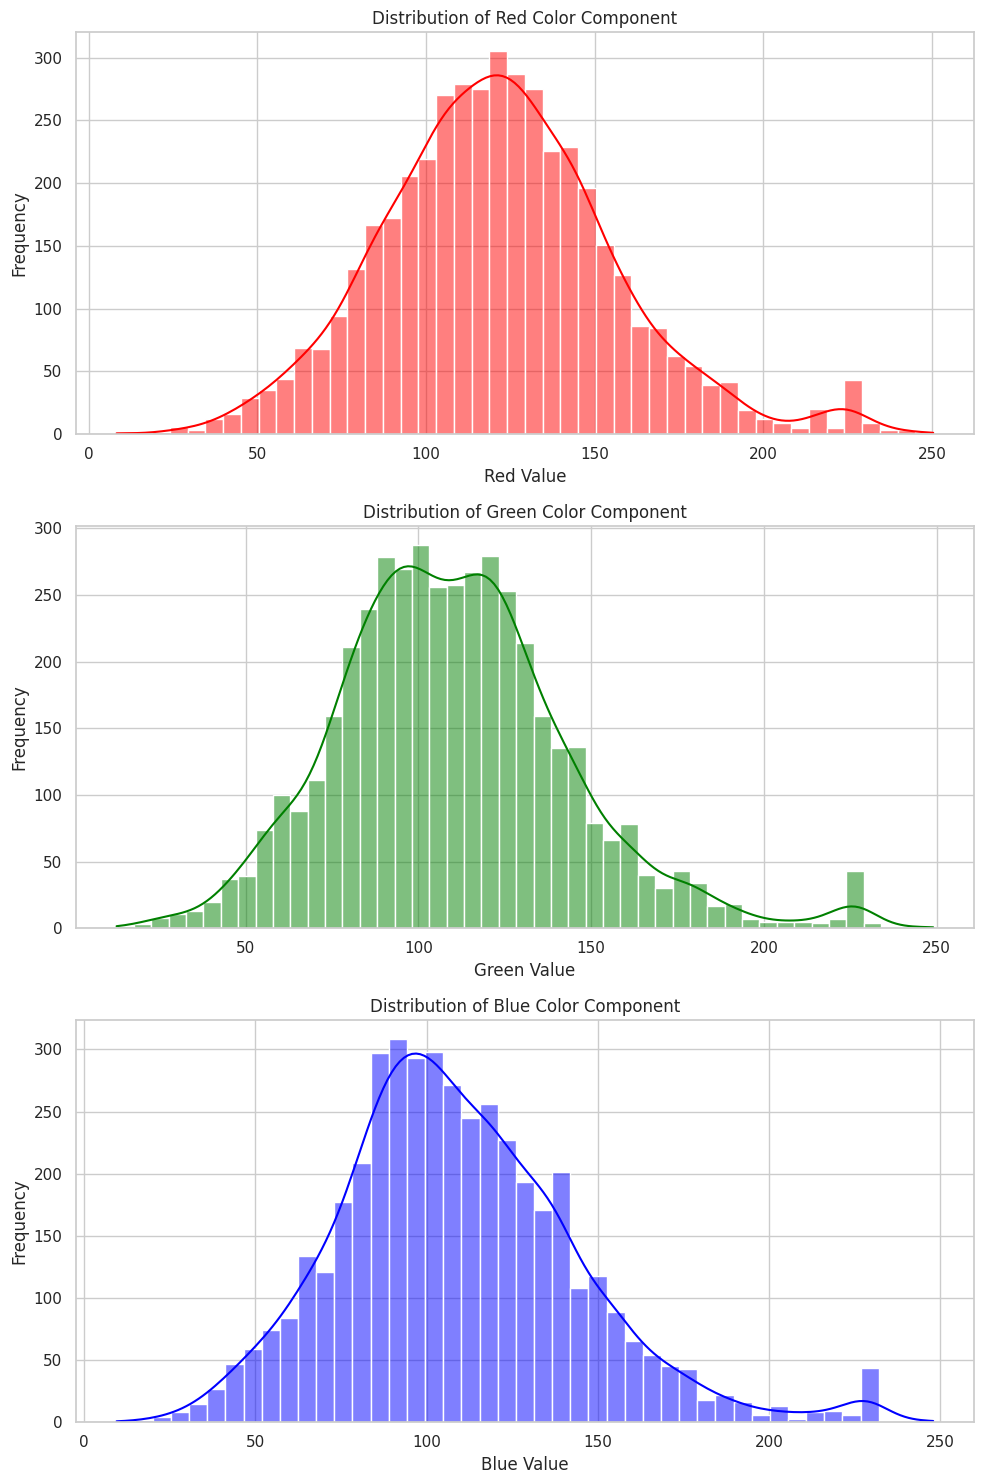

In [ ]:
# Setting the style for the plots
sns.set(style="whitegrid")

# Creating subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Histogram for Red color component
sns.histplot(data=dataset, x="Red", kde=True, ax=axes[0], color="red")
axes[0].set_title("Distribution of Red Color Component")
axes[0].set_xlabel("Red Value")
axes[0].set_ylabel("Frequency")

# Histogram for Green color component
sns.histplot(data=dataset, x="Green", kde=True, ax=axes[1], color="green")
axes[1].set_title("Distribution of Green Color Component")
axes[1].set_xlabel("Green Value")
axes[1].set_ylabel("Frequency")

# Histogram for Blue color component
sns.histplot(data=dataset, x="Blue", kde=True, ax=axes[2], color="blue")
axes[2].set_title("Distribution of Blue Color Component")
axes[2].set_xlabel("Blue Value")
axes[2].set_ylabel("Frequency")

# Adjusting layout
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
import ast

# Parsing the list-like strings in 'CapresDetect' column
dataset['CapresDetect_parsed'] = dataset['CapresDetect'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) and x != '[]' else [])

# Exploding the 'CapresDetect_parsed' column
exploded_capres = dataset.explode('CapresDetect_parsed')

# Counting the occurrences of each candidate
capres_counts_exploded = exploded_capres['CapresDetect_parsed'].value_counts()
capres_counts_exploded = capres_counts_exploded[capres_counts_exploded.index != '']

print(capres_counts_exploded.head())

mahfud     666
ganjar     517
prabowo    389
anies      312
cakimin    198
Name: CapresDetect_parsed, dtype: int64


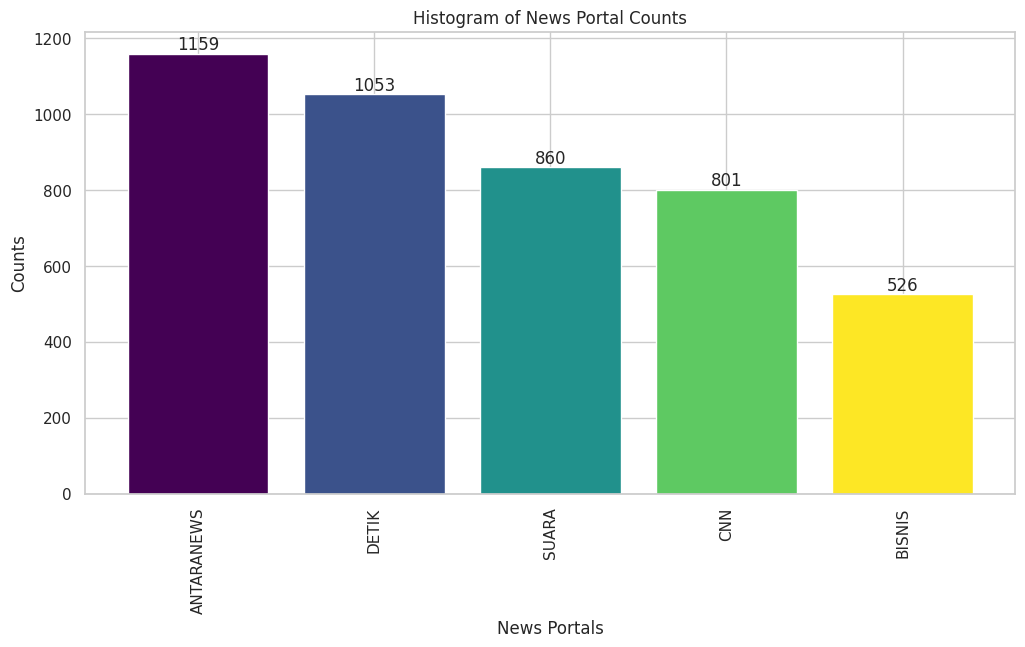

In [ ]:
# Calculate the counts of news portals
news_portal_counts = dataset['source_name_y'].value_counts()

# Assigning colors from the 'viridis' colormap to each bar in the histogram
colors = plt.cm.viridis(np.linspace(0, 1, len(news_portal_counts)))

# Plotting the histogram with the defined colors and adding the exact counts above each bar
plt.figure(figsize=(12, 6))
bars = plt.bar(news_portal_counts.index, news_portal_counts.values, color=colors)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.title("Histogram of News Portal Counts")
plt.xlabel("News Portals")
plt.ylabel("Counts")
plt.xticks(rotation=90)

# Display the plot
plt.show()

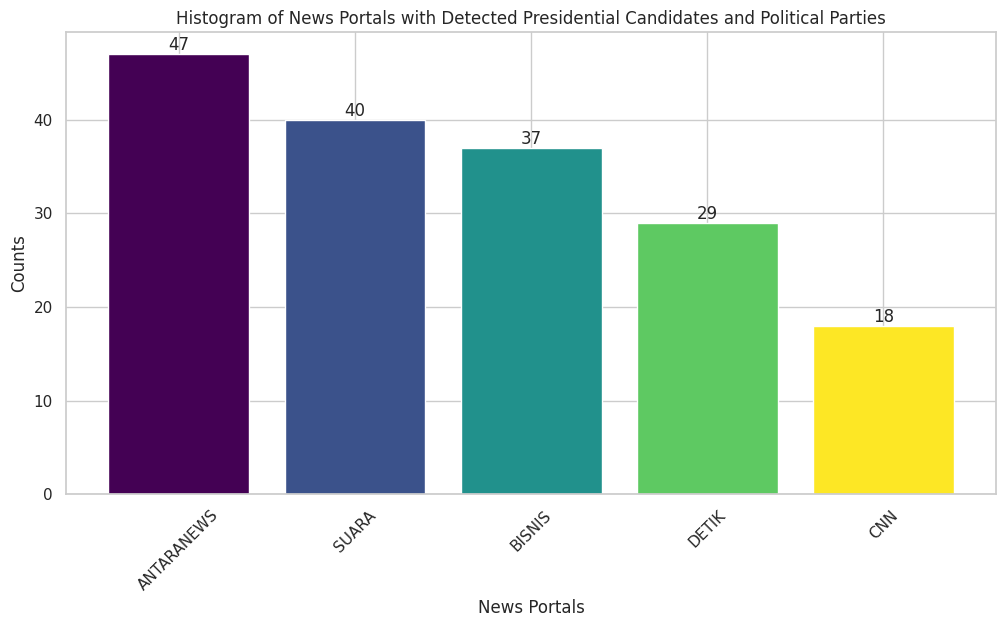

In [ ]:
# Preprocess 'CapresDetect' and 'ParpolDetect'
dataset['CapresDetect_parsed'] = dataset['CapresDetect'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) and x != '[]' else [])
dataset['ParpolDetect_parsed'] = dataset['ParpolDetect'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) and x != '[]' else [])

# Filtering the dataset to include only rows where both 'CapresDetect' and 'ParpolDetect' have detected values (non-empty lists)
filtered_dataset = dataset[(dataset['CapresDetect_parsed'].str.len() > 0) & (dataset['ParpolDetect_parsed'].str.len() > 0)]

# Counting the occurrences of each source in this filtered dataset
filtered_source_counts = filtered_dataset['source_name_y'].value_counts()

# Assigning colors from the 'viridis' colormap to each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(filtered_source_counts)))

# Creating a histogram for the filtered 'source_name_y' column
plt.figure(figsize=(12, 6))
bars = plt.bar(filtered_source_counts.index, filtered_source_counts.values, color=colors)

# Adding the exact counts above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.title("Histogram of News Portals with Detected Presidential Candidates and Political Parties")
plt.xlabel("News Portals")
plt.ylabel("Counts")
plt.xticks(rotation=45)

# Display the plot
plt.show()

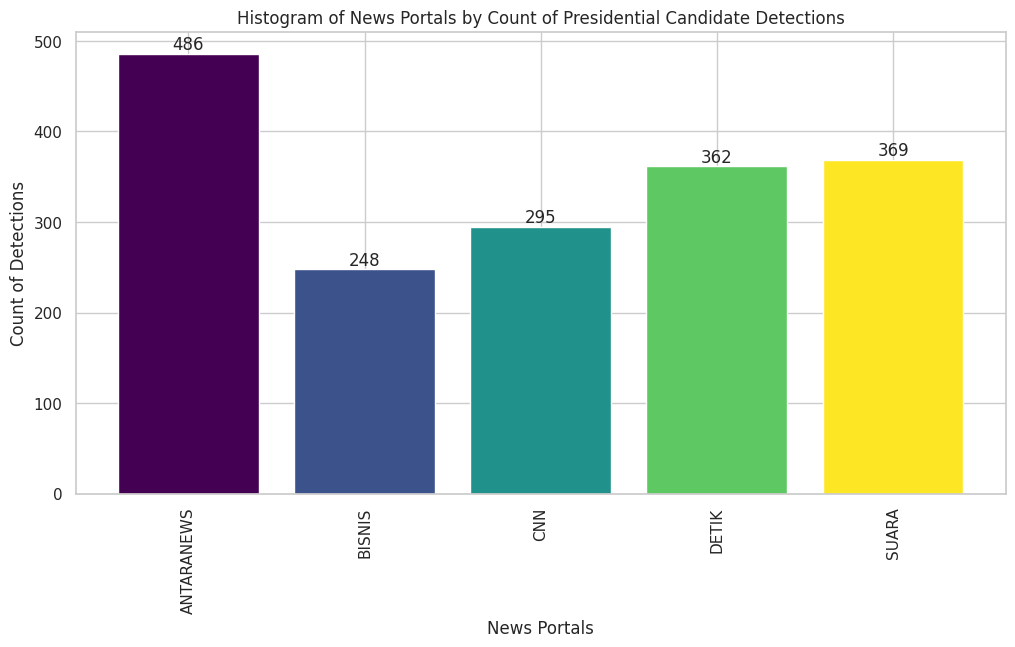

In [ ]:
# Parsing the 'CapresDetect' column to count entries with one or more detected candidates as one detection
dataset['CapresDetect_non_empty'] = dataset['CapresDetect'].apply(lambda x: 1 if (pd.notna(x) and x != '[]') else 0)

# Summing up the non-empty detections per news portal
capres_detections_per_portal = dataset.groupby('source_name_y')['CapresDetect_non_empty'].sum()

# Assigning colors from the 'viridis' colormap to each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(capres_detections_per_portal)))

# Creating the histogram
plt.figure(figsize=(12, 6))
bars = plt.bar(capres_detections_per_portal.index, capres_detections_per_portal.values, color=colors)

# Adding exact counts above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.title("Histogram of News Portals by Count of Presidential Candidate Detections")
plt.xlabel("News Portals")
plt.ylabel("Count of Detections")
plt.xticks(rotation=90)

# Display the plot
plt.show()

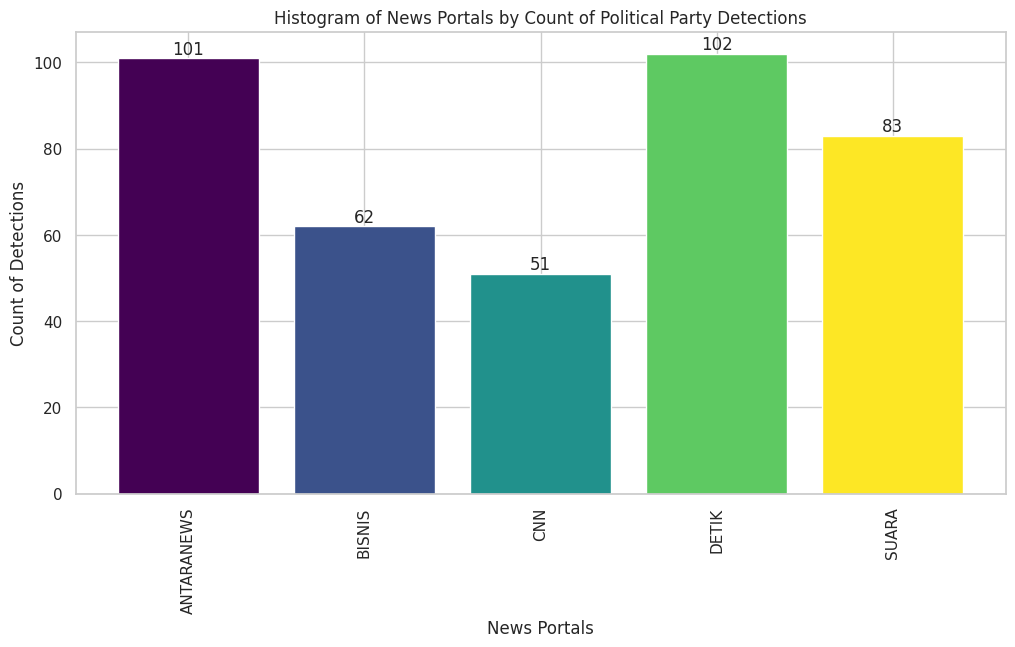

In [ ]:
# Creating a new column to count entries with one or more detected political parties as one detection
dataset['ParpolDetect_non_empty'] = dataset['ParpolDetect'].apply(lambda x: 1 if (pd.notna(x) and x != '[]') else 0)

# Summing up the non-empty detections per news portal
parpol_detections_per_portal = dataset.groupby('source_name_y')['ParpolDetect_non_empty'].sum()

# Assigning colors from the 'viridis' colormap to each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(parpol_detections_per_portal)))

# Creating the histogram
plt.figure(figsize=(12, 6))
bars = plt.bar(parpol_detections_per_portal.index, parpol_detections_per_portal.values, color=colors)

# Adding exact counts above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.title("Histogram of News Portals by Count of Political Party Detections")
plt.xlabel("News Portals")
plt.ylabel("Count of Detections")
plt.xticks(rotation=90)

# Display the plot
plt.show()

# capres

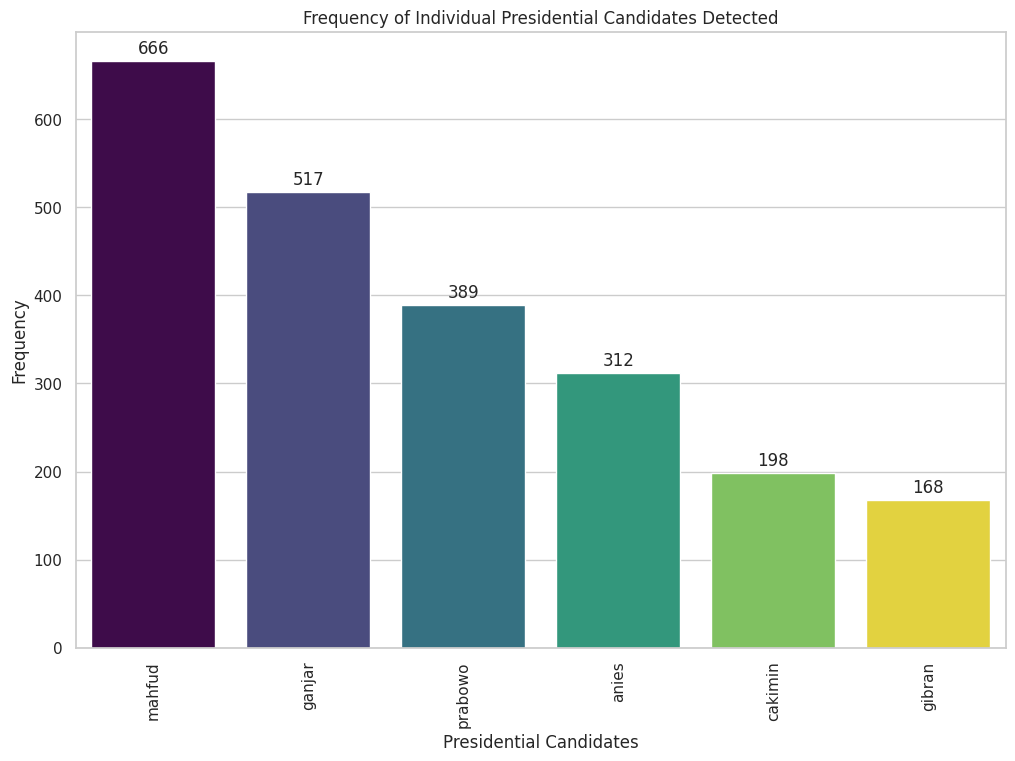

In [ ]:
# Preprocess 'CapresDetect'
dataset['CapresDetect_parsed'] = dataset['CapresDetect'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) and x != '[]' else [])
exploded_capres = dataset.explode('CapresDetect_parsed')

# Counting the occurrences of each presidential candidate
capres_counts_exploded = exploded_capres['CapresDetect_parsed'].value_counts()

# Assigning colors from the 'viridis' colormap to each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(capres_counts_exploded)))

# Creating the bar plot with 'viridis' colors and adding exact counts above the bars
plt.figure(figsize=(12, 8))
bars = sns.barplot(x=capres_counts_exploded.index, y=capres_counts_exploded.values, palette=colors)

# Adding the exact counts above the bars
for p in bars.patches:
    bars.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0, 9),
                  textcoords = 'offset points')

plt.title("Frequency of Individual Presidential Candidates Detected")
plt.xlabel("Presidential Candidates")
plt.ylabel("Frequency")
plt.xticks(rotation=90)

# Display the plot
plt.show()


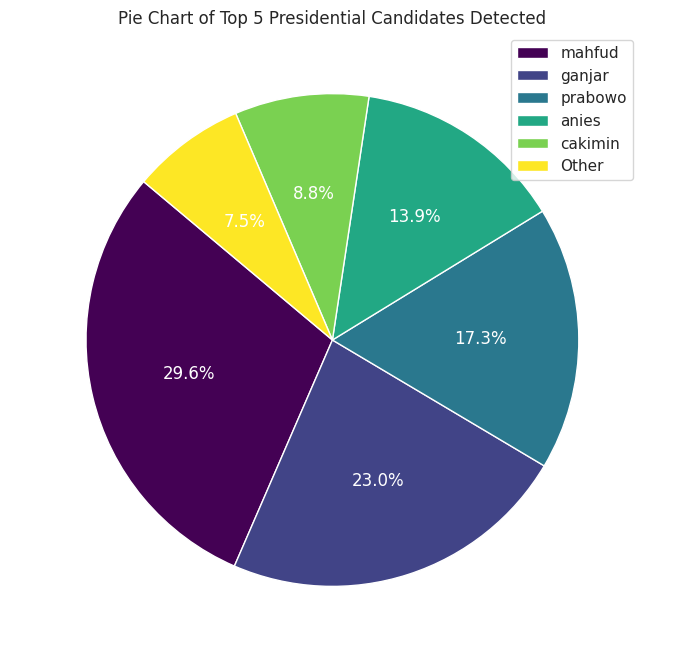

In [ ]:
# Preprocess 'CapresDetect'
dataset['CapresDetect_parsed'] = dataset['CapresDetect'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) and x != '[]' else [])
exploded_capres = dataset.explode('CapresDetect_parsed')

# Summarizing the data for the pie chart for 'CapresDetect'
capres_counts = exploded_capres['CapresDetect_parsed'].value_counts()

# Number of top candidates to display in the pie chart
top_n_capres = 5

# Getting the top N candidates
top_capres_counts = capres_counts.head(top_n_capres)

# Adding an 'Other' category for the rest of the candidates
other_capres_count = capres_counts.iloc[top_n_capres:].sum()
top_capres_counts['Other'] = other_capres_count

# Creating the pie chart for top N candidates + 'Other' with white text for the percentages
plt.figure(figsize=(10, 8))
top_capres_counts.plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
    startangle=140,
    cmap='viridis',
    legend=True,
    textprops={'color': "white"}
)
plt.title(f"Pie Chart of Top {top_n_capres} Presidential Candidates Detected")
plt.ylabel('')  # Hiding the y-label for clarity

# Display the plot
plt.show()

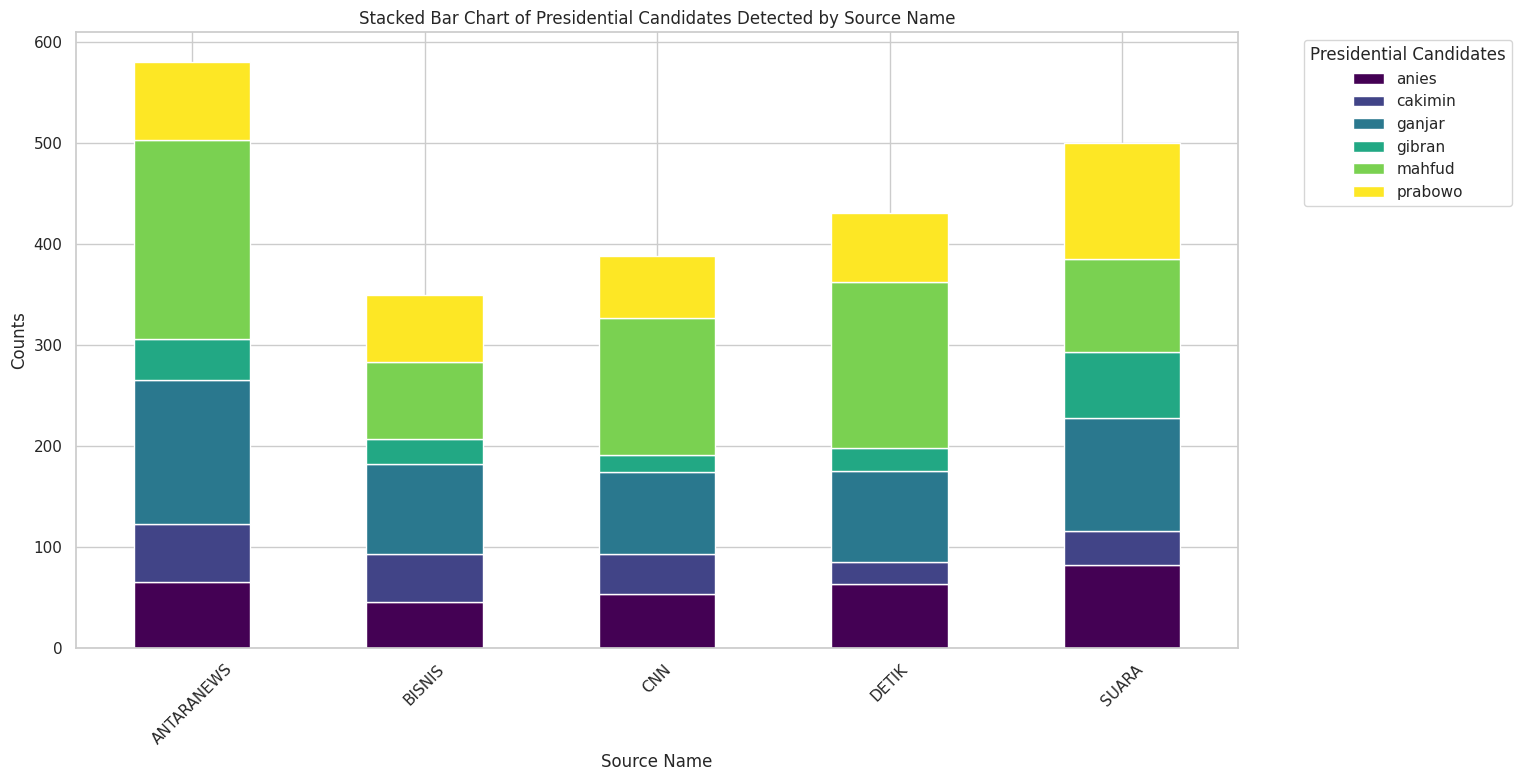

In [ ]:
# Exploding the 'CapresDetect_parsed' column
exploded_capres = dataset.explode('CapresDetect_parsed')

# Grouping by 'source_name_y' and 'CapresDetect_parsed' and counting the occurrences
grouped_data = exploded_capres.groupby(['source_name_y', 'CapresDetect_parsed']).size().reset_index(name='counts')

# Summarizing the data for the stacked bar chart
stacked_data = grouped_data.pivot_table(index='source_name_y', columns='CapresDetect_parsed', values='counts', aggfunc='sum', fill_value=0)

# Visualization code for the stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')
plt.title("Stacked Bar Chart of Presidential Candidates Detected by Source Name")
plt.xlabel("Source Name")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.legend(title="Presidential Candidates", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

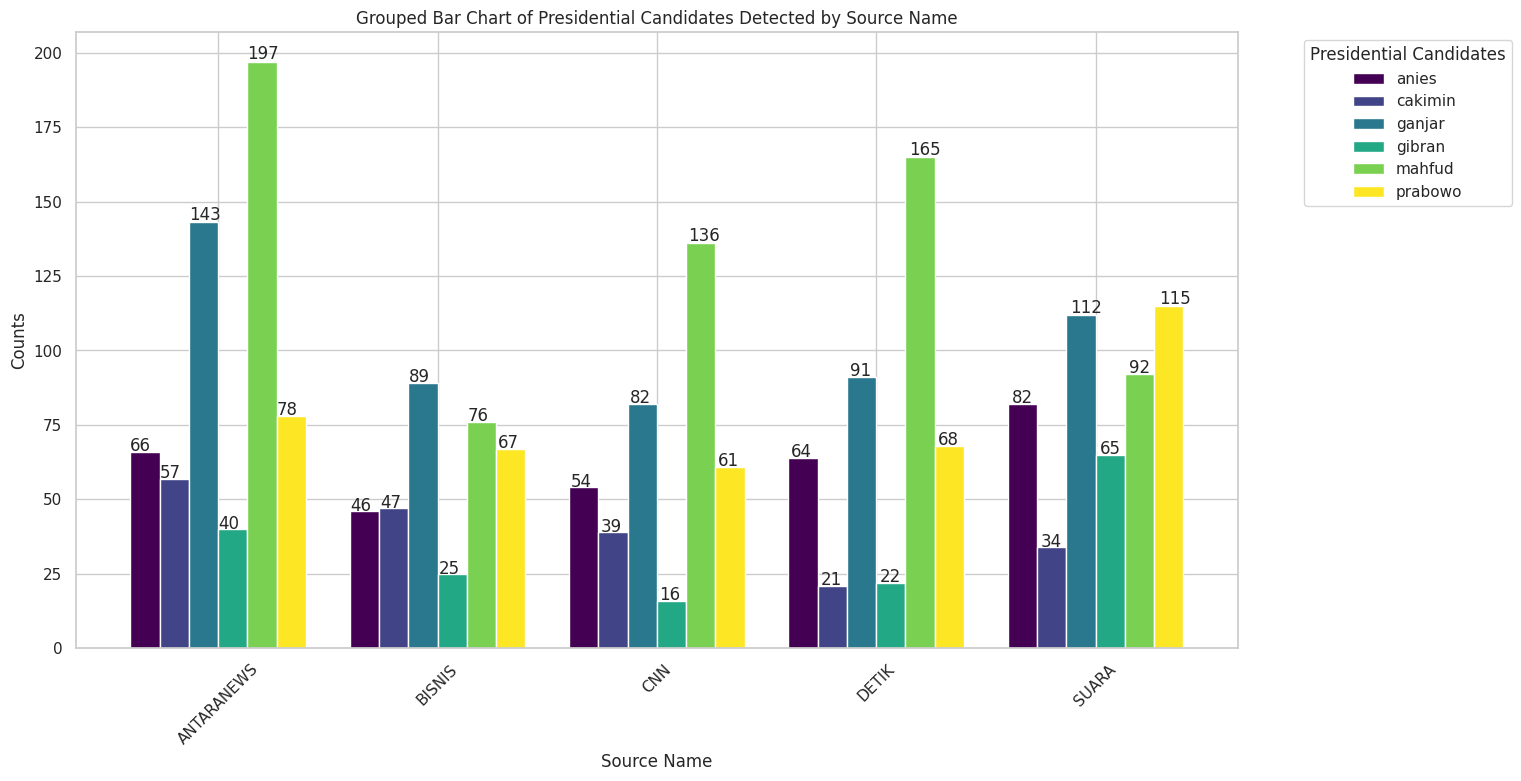

In [ ]:
# Preprocess 'CapresDetect'
dataset['CapresDetect_parsed'] = dataset['CapresDetect'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) and x != '[]' else [])
exploded_capres = dataset.explode('CapresDetect_parsed')

# Grouping by 'source_name_y' and 'CapresDetect_parsed'
grouped_capres_data = exploded_capres.groupby(['source_name_y', 'CapresDetect_parsed']).size().reset_index(name='counts')

# Creating a pivot table for the grouped bar chart
grouped_bar_capres_data = grouped_capres_data.pivot_table(index='source_name_y', columns='CapresDetect_parsed', values='counts', aggfunc='sum', fill_value=0)

colormap = plt.cm.viridis(np.linspace(0, 1, grouped_bar_capres_data.shape[1]))

# Plotting the grouped bar chart
ax = grouped_bar_capres_data.plot(kind='bar', figsize=(15, 8), color=colormap, width=0.8)
plt.title("Grouped Bar Chart of Presidential Candidates Detected by Source Name")
plt.xlabel("Source Name")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.legend(title="Presidential Candidates", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding exact counts above each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Display the plot
plt.show()

In [ ]:
pip install prince

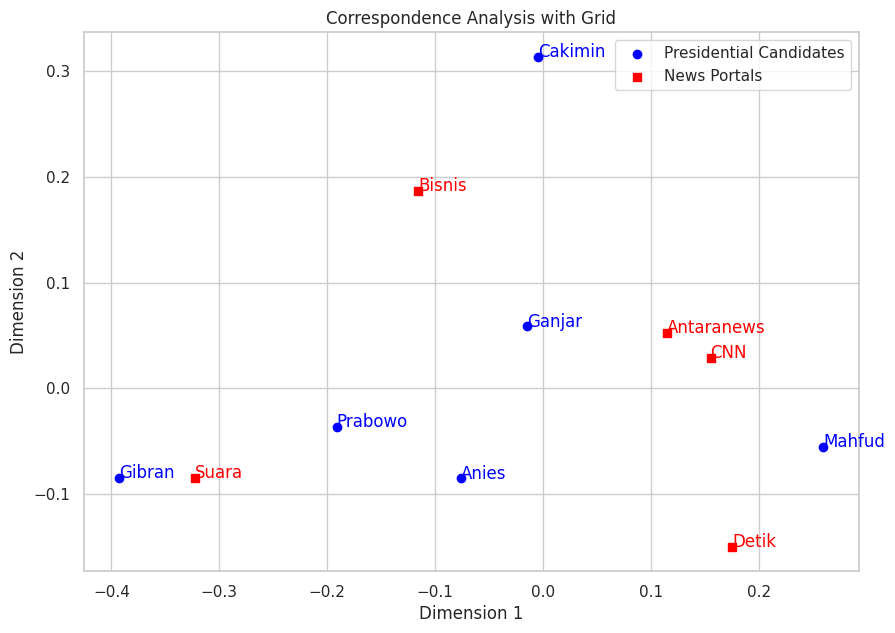

In [ ]:
import pandas as pd
import prince  # Library untuk analisis korespondensi

# Anggap 'data' adalah DataFrame yang telah Anda buat dari gambar
# data = pd.read_csv('path_to_your_csv_or_excel.csv')

# Untuk tujuan demonstrasi, saya akan membuat DataFrame dummy
# Anda harus menggantinya dengan DataFrame yang sebenarnya dari data Anda
data = pd.DataFrame({
    'Antaranews': [66, 57, 143, 40, 197, 78],
    'Bisnis': [46, 47, 89, 25, 76, 67],
    'CNN': [54, 39, 82, 16, 136, 61],
    'Detik': [64, 21, 91, 22, 165, 68],
    'Suara': [82, 34, 112, 65, 92, 115]
}, index=['Anies', 'Cakimin', 'Ganjar', 'Gibran', 'Mahfud', 'Prabowo'])

# Fit model CA pada data
ca = prince.CA(
    n_components=2,
    n_iter=3,
    copy=True,
    engine='sklearn',  # Set engine to 'sklearn'
    random_state=42
)

# Fit the CA model
ca = ca.fit(data)

# We will use the row and column coordinates from the CA object
row_coords = ca.row_coordinates(data)
col_coords = ca.column_coordinates(data)

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the row coordinates with blue color
ax.scatter(row_coords[0], row_coords[1], color='blue', label='Presidential Candidates')

# Plot the column coordinates with red color
ax.scatter(col_coords[0], col_coords[1], color='red', label='News Portals', marker='s')

# Annotate the points with labels
for i, txt in enumerate(row_coords.index):
    ax.annotate(txt, (row_coords[0][i], row_coords[1][i]), color='blue')
for i, txt in enumerate(col_coords.index):
    ax.annotate(txt, (col_coords[0][i], col_coords[1][i]), color='red')

# Add grid to the plot
ax.grid(True)

# Set labels and title
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Correspondence Analysis with Grid')

# Add a legend
ax.legend()

# Show the plot
plt.show()

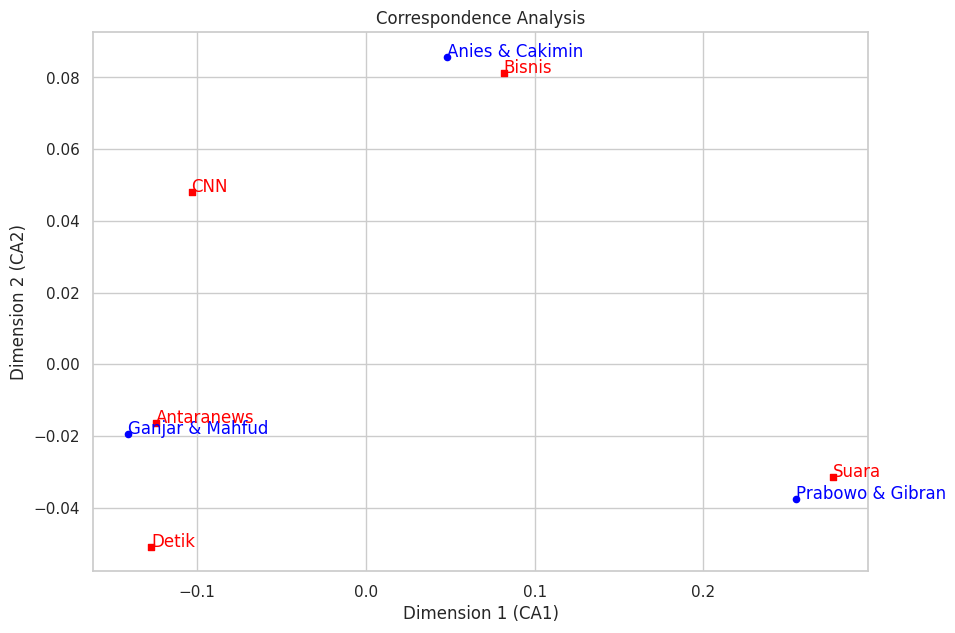

In [ ]:
# Replace this with actual data loading if available
data = pd.DataFrame({
    'Antaranews': [123, 340, 118],
    'Bisnis': [93, 165, 92],
    'CNN': [93, 218, 77],
    'Detik': [85, 256, 90],
    'Suara': [116, 204, 180]
}, index=['Anies & Cakimin', 'Ganjar & Mahfud', 'Prabowo & Gibran'])

# Initialize the CA object
ca = prince.CA(
    n_components=2,
    n_iter=3,
    copy=True,
    engine='sklearn',
    random_state=42
)

# Fit the CA model
ca = ca.fit(data)

# Extracting the row and column coordinates
row_coords = ca.row_coordinates(data)
col_coords = ca.column_coordinates(data)

# Plotting the row coordinates
fig, ax = plt.subplots(figsize=(10, 7))
row_coords.plot(kind='scatter', x=0, y=1, ax=ax, color='blue', figsize=(10, 7))

# Plotting the column coordinates
col_coords.plot(kind='scatter', x=0, y=1, ax=ax, color='red', figsize=(10, 7), marker='s')

# Annotating the row points with the index labels
for i, txt in enumerate(row_coords.index):
    ax.annotate(txt, (row_coords.iloc[i, 0], row_coords.iloc[i, 1]), color='blue')

# Annotating the column points with the index labels
for i, txt in enumerate(col_coords.index):
    ax.annotate(txt, (col_coords.iloc[i, 0], col_coords.iloc[i, 1]), color='red')

# Setting the title and labels
ax.set_title('Correspondence Analysis')
ax.set_xlabel('Dimension 1 (CA1)')
ax.set_ylabel('Dimension 2 (CA2)')

# Showing the plot
plt.show()

# Parpol

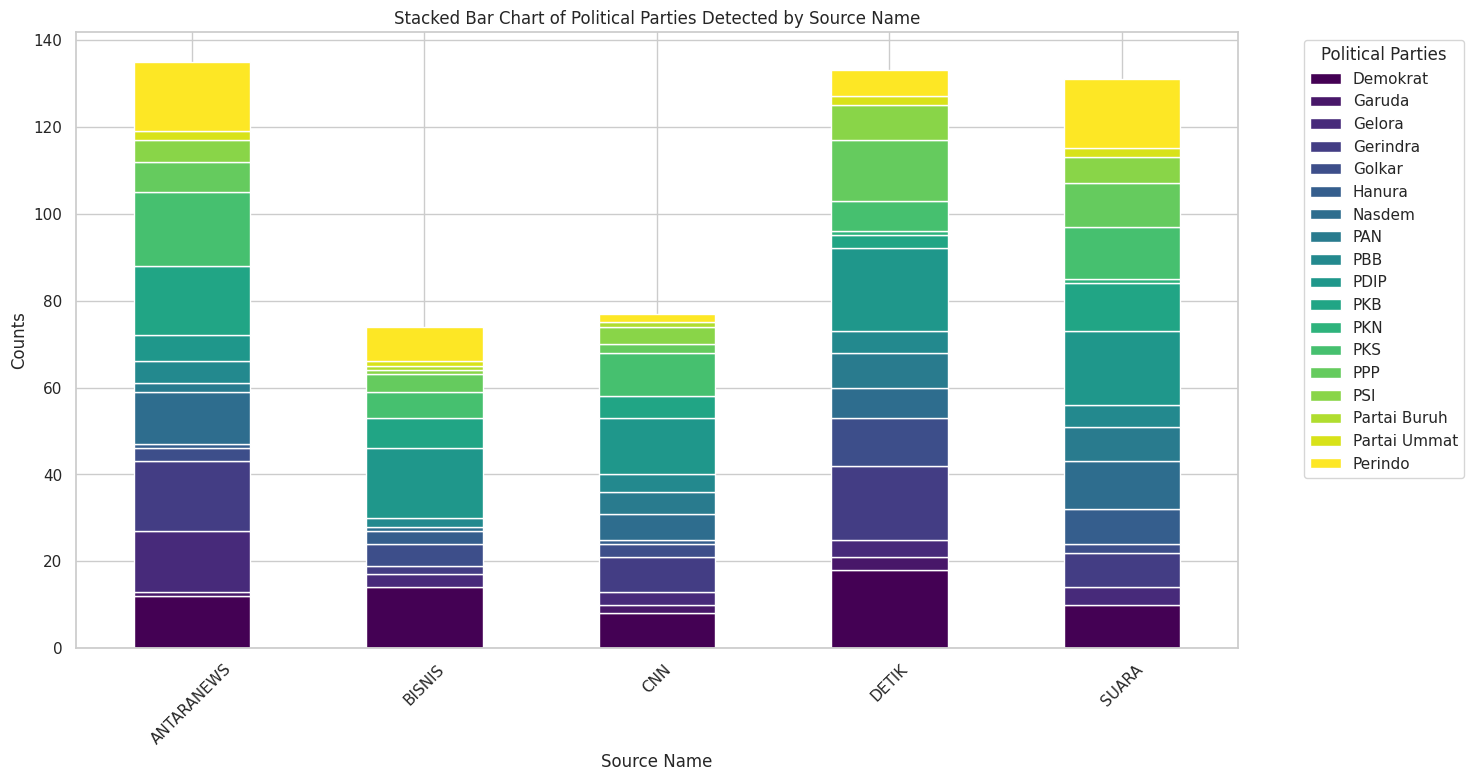

In [ ]:
# Preprocessing steps for 'source_name_y' and 'ParpolDetect' relationship visualization

# Parsing the list-like strings in 'ParpolDetect' column
dataset['ParpolDetect_parsed'] = dataset['ParpolDetect'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) and x != '[]' else [])

# Exploding the 'ParpolDetect_parsed' column
exploded_parpol = dataset.explode('ParpolDetect_parsed')

# Grouping by 'source_name_y' and 'ParpolDetect_parsed' and counting the occurrences
grouped_parpol_data = exploded_parpol.groupby(['source_name_y', 'ParpolDetect_parsed']).size().reset_index(name='counts')

# Summarizing the data for the stacked bar chart
stacked_parpol_data = grouped_parpol_data.pivot_table(index='source_name_y', columns='ParpolDetect_parsed', values='counts', aggfunc='sum', fill_value=0)

# Visualization code for the stacked bar chart
stacked_parpol_data.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')
plt.title("Stacked Bar Chart of Political Parties Detected by Source Name")
plt.xlabel("Source Name")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.legend(title="Political Parties", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

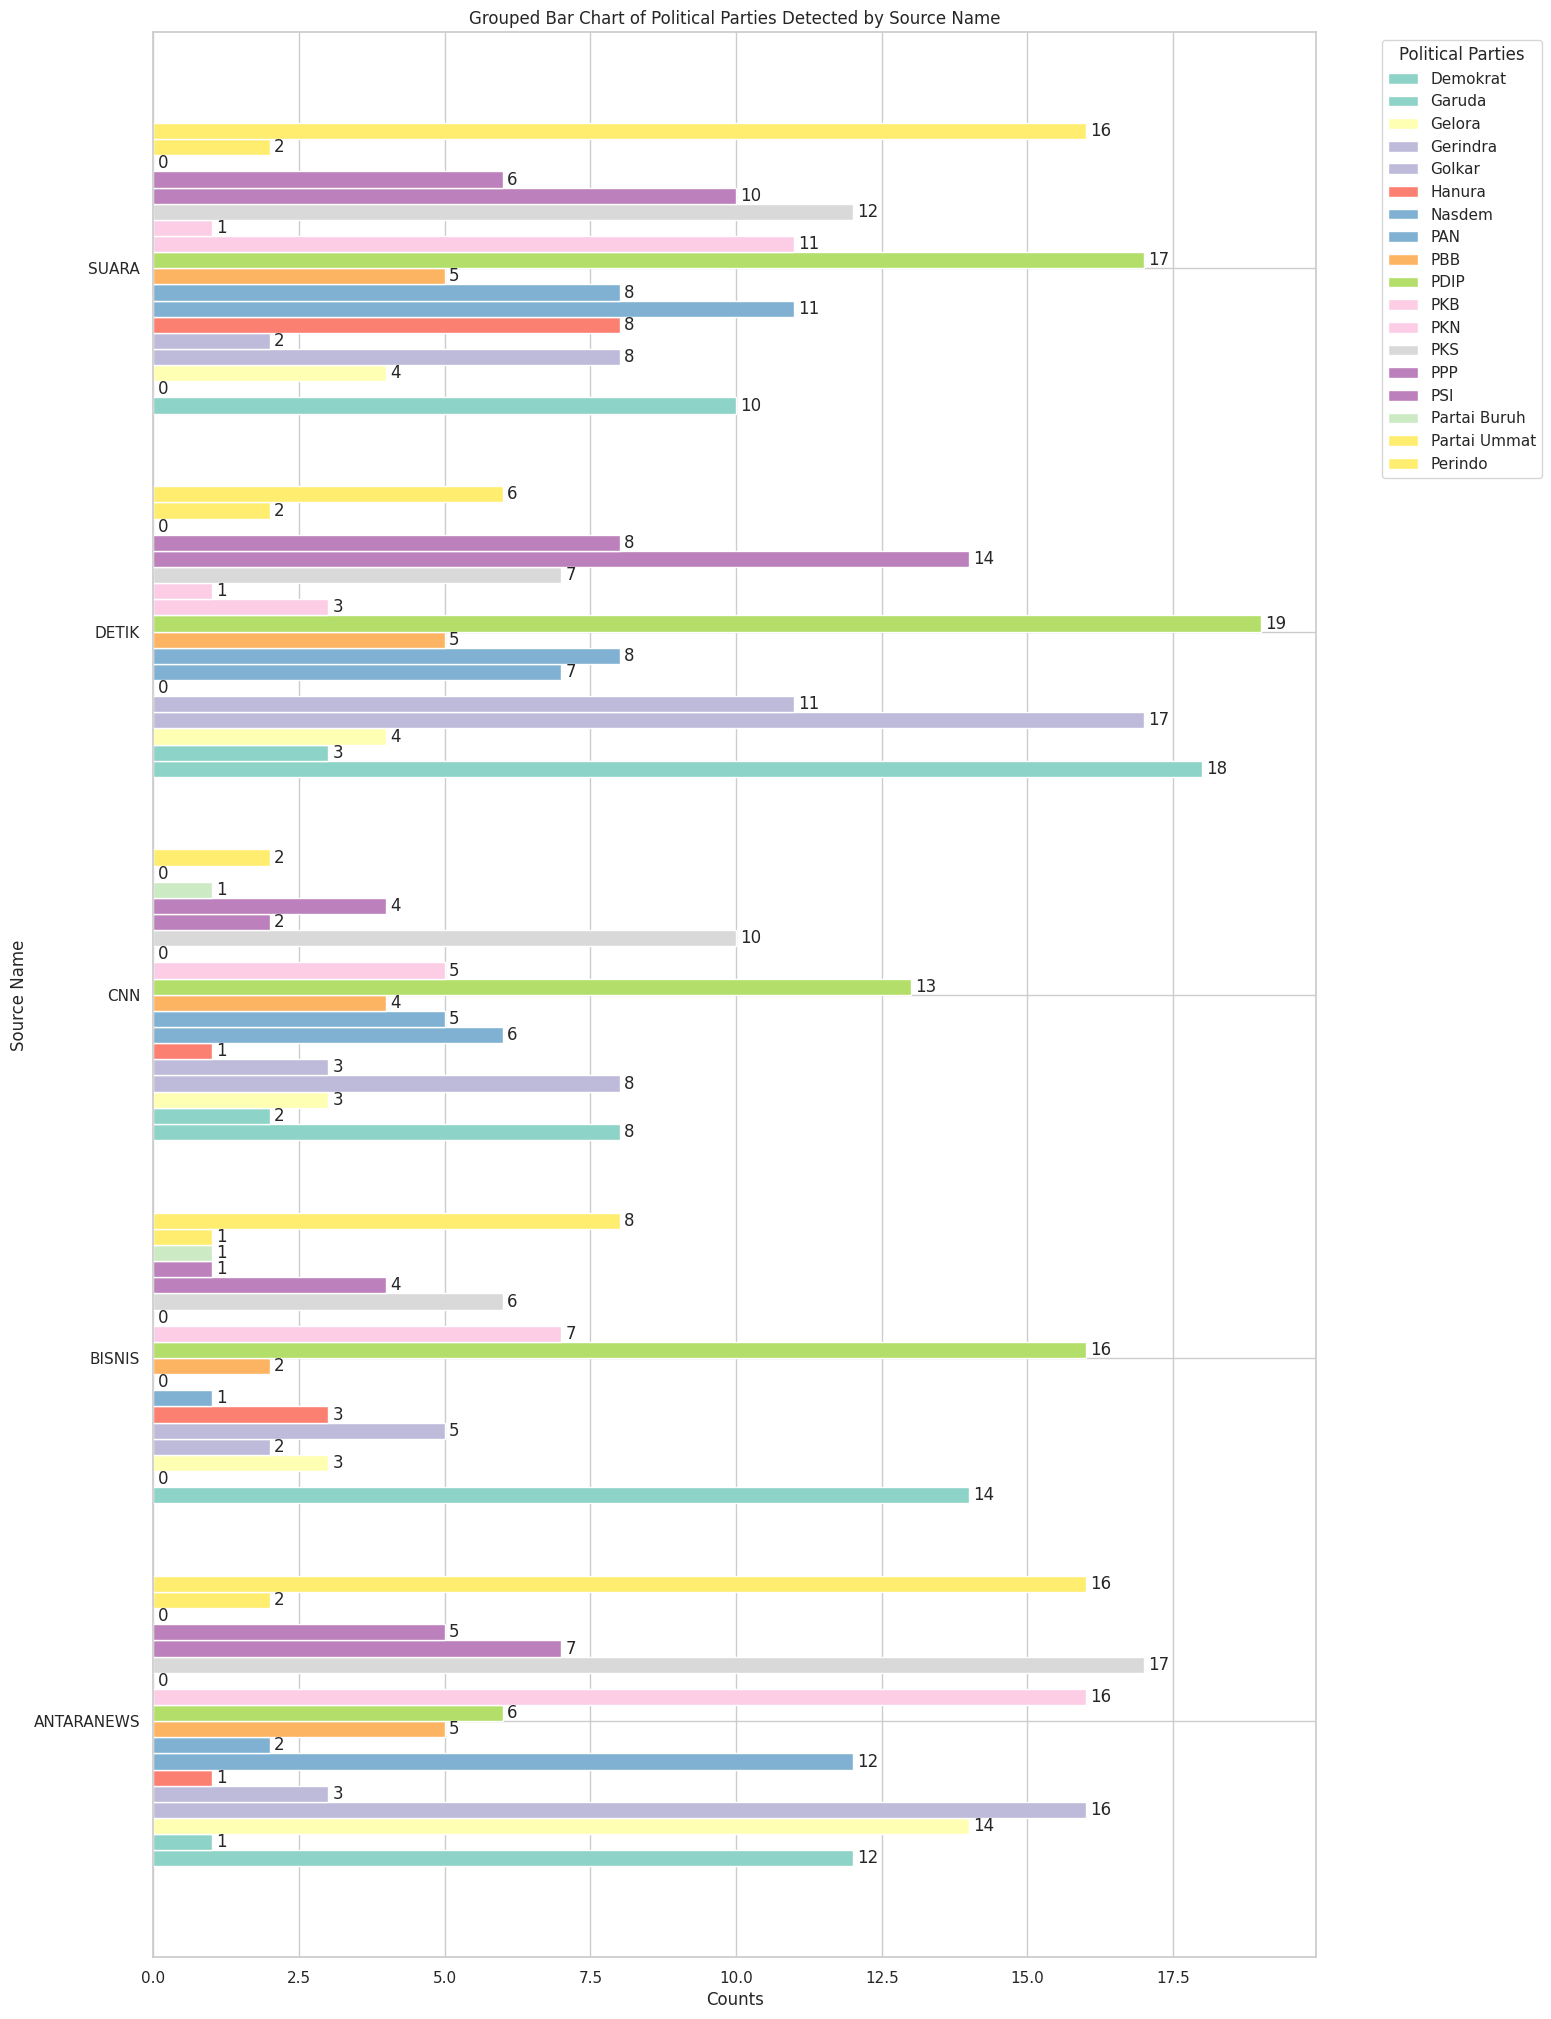

In [ ]:
# Your preprocessing steps
dataset['ParpolDetect_parsed'] = dataset['ParpolDetect'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) and x != '[]' else [])
exploded_parpol = dataset.explode('ParpolDetect_parsed')
grouped_parpol_data = exploded_parpol.groupby(['source_name_y', 'ParpolDetect_parsed']).size().reset_index(name='counts')
grouped_bar_data = grouped_parpol_data.pivot_table(index='source_name_y', columns='ParpolDetect_parsed', values='counts', aggfunc='sum', fill_value=0)

# Assuming 'grouped_bar_data' is the pivot table ready for plotting
ax = grouped_bar_data.plot(kind='barh', figsize=(15, 25), colormap='Set3', width=0.8)
plt.title("Grouped Bar Chart of Political Parties Detected by Source Name")
plt.ylabel("Source Name")
plt.xlabel("Counts")

# Adding the exact counts to the side of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

# Adjust the legend
plt.legend(title="Political Parties", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

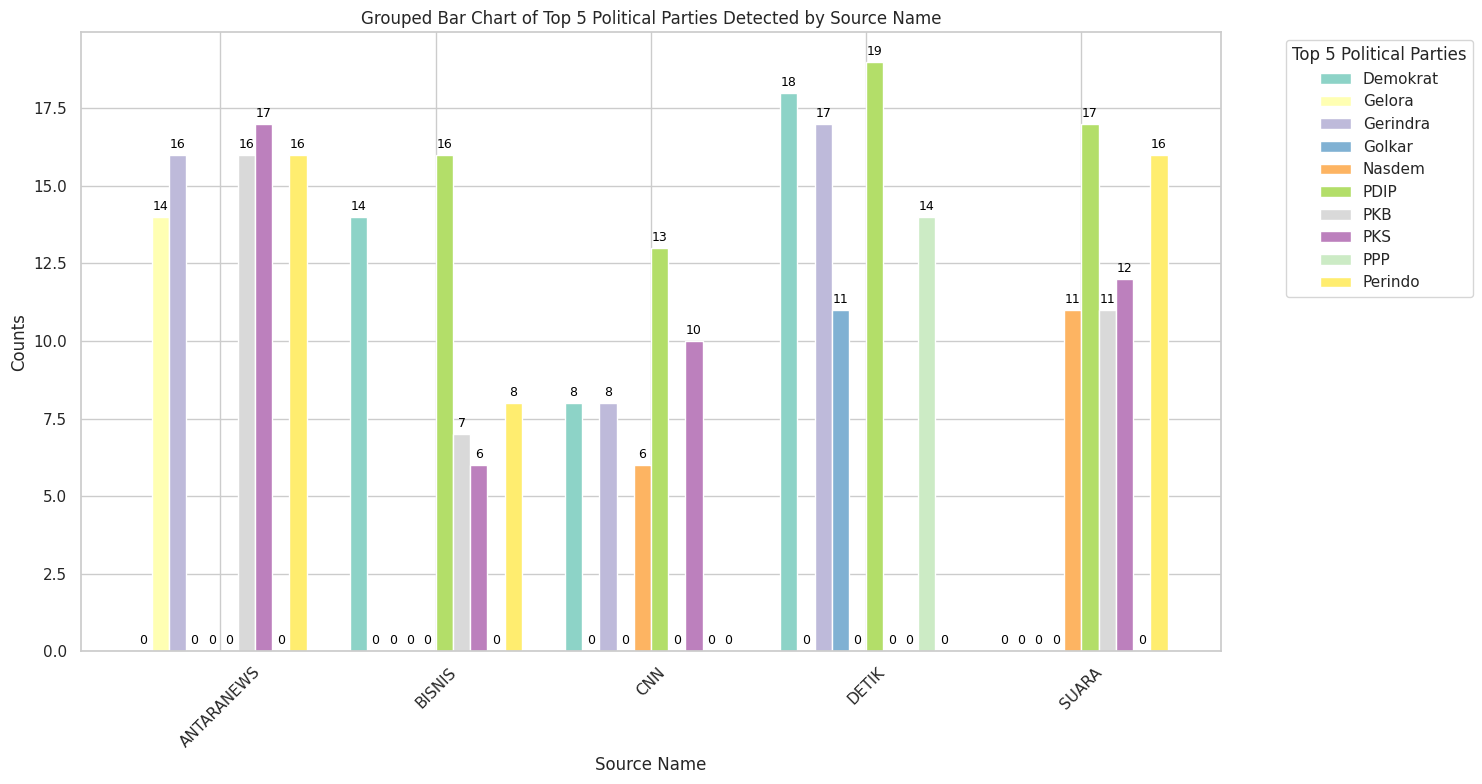

In [ ]:
# Preprocess 'ParpolDetect' column to remove duplicates and parse string lists into actual lists
dataset['ParpolDetect_parsed'] = dataset['ParpolDetect'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) and x != '[]' else [])

# Exploding the 'ParpolDetect_parsed' list into individual rows
exploded_parpol = dataset.explode('ParpolDetect_parsed')

# Grouping by 'source_name_y' and 'ParpolDetect_parsed' to count occurrences
grouped_parpol_data = exploded_parpol.groupby(['source_name_y', 'ParpolDetect_parsed']).size().reset_index(name='counts')

# Identifying the top 5 political parties for each source based on count
top_5_parpol_per_source = grouped_parpol_data.groupby('source_name_y')['counts'].nlargest(5).reset_index()
top_5_parpol_data = grouped_parpol_data.loc[top_5_parpol_per_source['level_1']]

# Creating a pivot table for the top 5 political parties per source
top_5_grouped_bar_data = top_5_parpol_data.pivot_table(index='source_name_y', columns='ParpolDetect_parsed', values='counts', aggfunc='sum', fill_value=0)

# Plotting the grouped bar chart with 'viridis' colormap
ax = top_5_grouped_bar_data.plot(kind='bar', figsize=(15, 8), colormap='Set3', width=0.8)
plt.title("Grouped Bar Chart of Top 5 Political Parties Detected by Source Name")
plt.xlabel("Source Name")
plt.ylabel("Counts")
plt.xticks(rotation=45)

# Adding the exact counts above the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=9, color='black')

plt.legend(title="Top 5 Political Parties", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

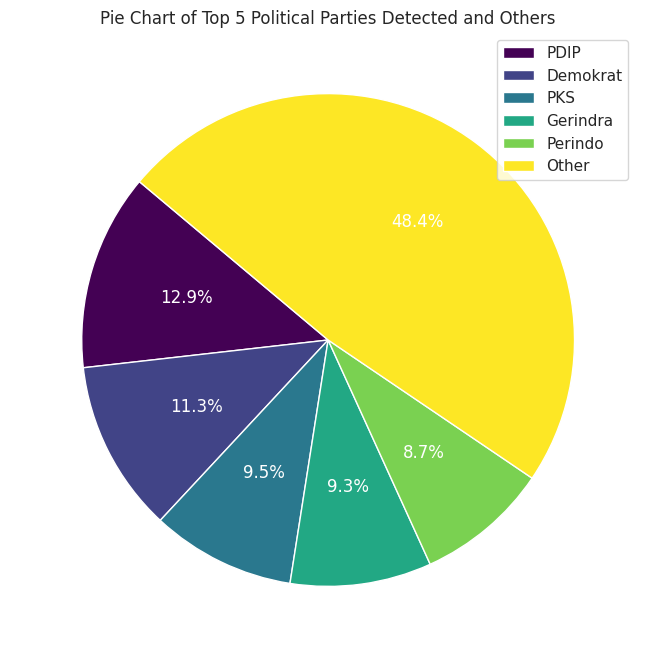

In [ ]:
# Preprocess 'ParpolDetect'
dataset['ParpolDetect_parsed'] = dataset['ParpolDetect'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) and x != '[]' else [])
exploded_parpol = dataset.explode('ParpolDetect_parsed')

# Summarizing the data for the pie chart for 'ParpolDetect'
parpol_counts = exploded_parpol['ParpolDetect_parsed'].value_counts()

# Number of top parties to display in the pie chart
top_n_parties = 5

# Getting the top N parties
top_parpol_counts = parpol_counts.head(top_n_parties)

# Adding an 'Other' category for the rest of the parties
other_parpol_count = parpol_counts.iloc[top_n_parties:].sum()
top_parpol_counts['Other'] = other_parpol_count

# Creating the pie chart for top N parties + 'Other' with white text for the percentages
plt.figure(figsize=(10, 8))
top_parpol_counts.plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
    startangle=140,
    cmap='viridis',
    legend=True,
    textprops={'color': "white"}
)
plt.title(f"Pie Chart of Top {top_n_parties} Political Parties Detected and Others")
plt.ylabel('')  # Hiding the y-label for clarity

# Display the plot
plt.show()

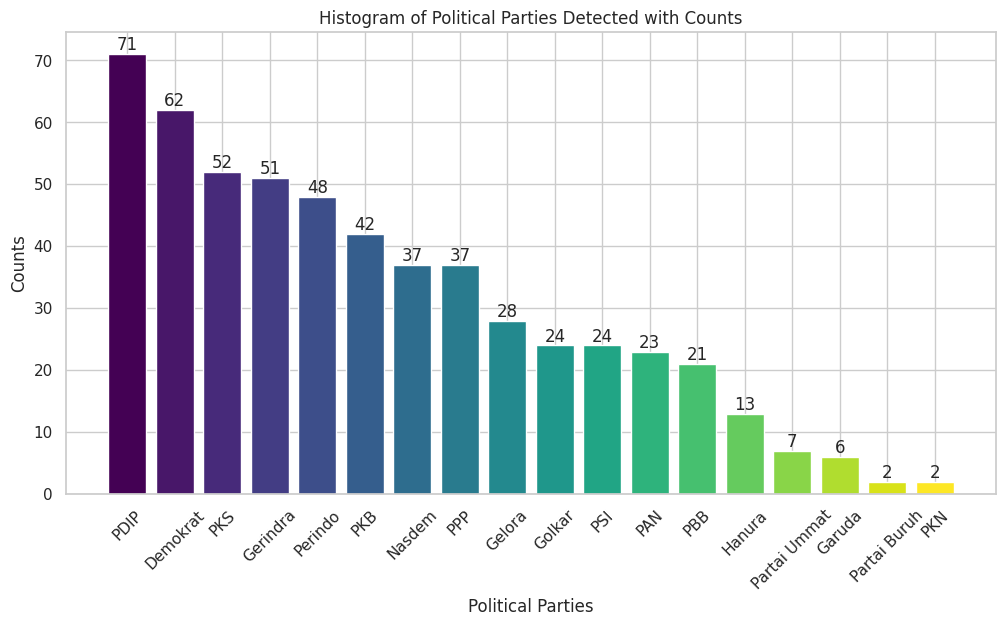

In [ ]:
# Assigning different colors to each bar in the histogram
colors = plt.cm.viridis(np.linspace(0, 1, len(parpol_counts)))

# Creating a histogram with different colors for each political party and adding exact counts above the bars
plt.figure(figsize=(12, 6))
bars = plt.bar(parpol_counts.index, parpol_counts.values, color=colors)

# Adding the exact counts above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.title("Histogram of Political Parties Detected with Counts")
plt.xlabel("Political Parties")
plt.ylabel("Counts")
plt.xticks(rotation=45)

# Display the plot
plt.show()

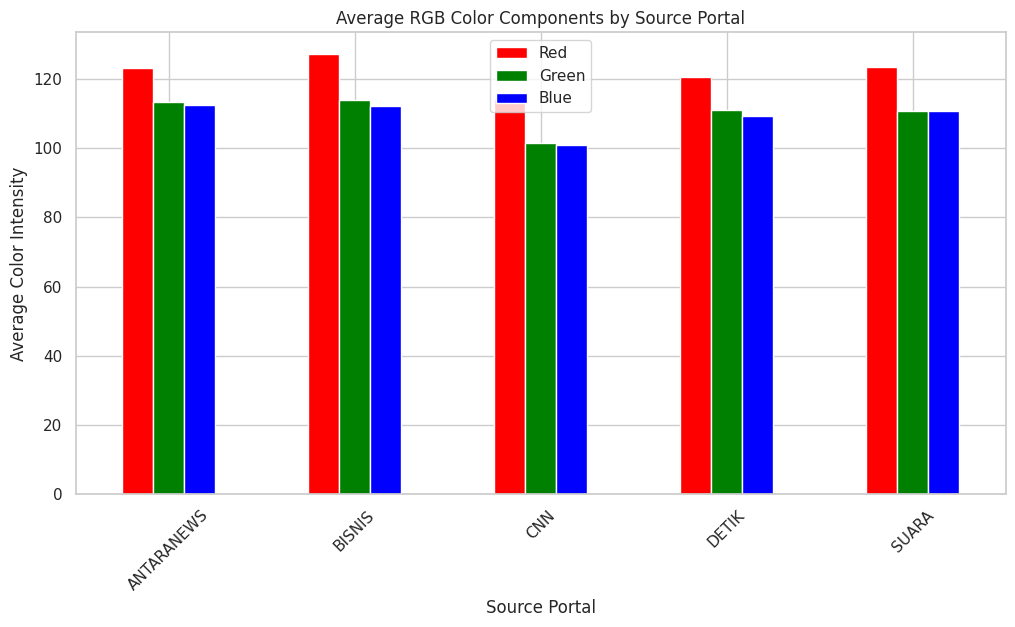

In [ ]:
# Calculating the average RGB values for each source portal
average_rgb_per_source = dataset.groupby('source_name_y')[['Red', 'Green', 'Blue']].mean()

# Creating a bar chart to visualize the average RGB values per source
average_rgb_per_source.plot(kind='bar', color=['red', 'green', 'blue'], figsize=(12, 6))
plt.title("Average RGB Color Components by Source Portal")
plt.xlabel("Source Portal")
plt.ylabel("Average Color Intensity")
plt.xticks(rotation=45)

# Display the plot
plt.show()

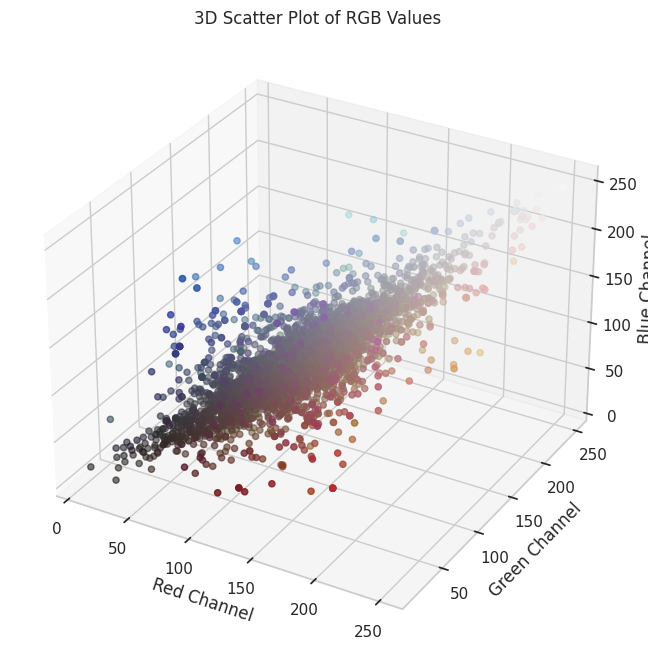

In [ ]:
# Validate that the expected RGB columns exist
if {'Red', 'Green', 'Blue'}.issubset(dataset.columns):
    # Create a scatter plot in 3D to visualize the RGB colors
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Normalize the RGB values to the range [0, 1] for matplotlib color representation
    rgb_normalized = dataset[['Red', 'Green', 'Blue']] / 255.0

    # Each point in the plot will be colored according to its RGB value
    ax.scatter(dataset['Red'], dataset['Green'], dataset['Blue'], c=rgb_normalized)

    # Setting the label for each axis
    ax.set_xlabel('Red Channel')
    ax.set_ylabel('Green Channel')
    ax.set_zlabel('Blue Channel')

    # Setting the title
    ax.set_title('3D Scatter Plot of RGB Values')

    # Show the plot
    plt.show()
else:
    print("The dataset does not contain the expected RGB columns.")